# Import Libraries for notebook

In [94]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import re

# Gather Data

### Source 1: read in twitter-archive-enhanced.csv file

In [3]:
#read in csv file
tw_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#view dataframe sample
tw_arch.size

40052

### Source 2: download image_predictions.tsv file

In [5]:
#url of source data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#store the http request 
response = requests.get(url)

#write the http response to a TSV file 
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)



In [6]:
#read file to dataframe
img_pred = pd.read_csv('image_predictions.tsv',sep='\t')
#check image_predictions.tsv downloaded correctly
img_pred.sample(5)

tweet_id                                            jpg_url  \
1888  848212111729840128    https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg   
651   682003177596559360    https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg   
1655  810284430598270976    https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg   
1438  774314403806253056    https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg   
1897  850380195714523136  https://pbs.twimg.com/ext_tw_video_thumb/85038...   

      img_num                  p1   p1_conf  p1_dog              p2   p2_conf  \
1888        1  Bedlington_terrier  0.333486    True    Ibizan_hound  0.245797   
651         1         triceratops  0.249872   False      chimpanzee  0.060929   
1655        1            malamute  0.620768    True      Eskimo_dog  0.158395   
1438        3          Eskimo_dog  0.596045    True  Siberian_husky  0.223067   
1897        1   Yorkshire_terrier  0.249012    True     Maltese_dog  0.166364   

      p2_dog               p3   p3_conf  p3_dog  
1888    True          wallaby  0.131647   False  
651    False             mask  0.050221   False  
1655    True  Tibetan_mastiff  0.028962    True  
1438    True           Saluki  0.036325    True  
1897    True         Shih-Tzu  0.142254    True

### Source 3: Gathering from tweetpy api

In [13]:
### API credentials
consumer_key = ####
consumer_secret = ####
access_token = ####
access_token_secret = ####

##create authentication handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

##connect to api
api = tweepy.API(auth, wait_on_rate_limit=True)

##get list of tweet id's from twitter-archive-enhanced.csv
tweet_id_list = tw_arch['tweet_id'].tolist()

#write api responses to text file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_id_list:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success: " + str(tweet_id))
            json.dump(tweet._json, outfile)
            outfile.write('\n')
             
        except:
            print("Failure: " + str(tweet_id))
            pass

Success: 892420643555336193
Success: 892177421306343426
Success: 891815181378084864
Success: 891689557279858688
Success: 891327558926688256
Success: 891087950875897856
Success: 890971913173991426
Success: 890729181411237888
Success: 890609185150312448
Success: 890240255349198849
Success: 890006608113172480
Success: 889880896479866881
Success: 889665388333682689
Success: 889638837579907072
Success: 889531135344209921
Success: 889278841981685760
Success: 888917238123831296
Success: 888804989199671297
Success: 888554962724278272
Failure: 888202515573088257
Success: 888078434458587136
Success: 887705289381826560
Success: 887517139158093824
Success: 887473957103951883
Success: 887343217045368832
Success: 887101392804085760
Success: 886983233522544640
Success: 886736880519319552
Success: 886680336477933568
Success: 886366144734445568
Success: 886267009285017600
Success: 886258384151887873
Success: 886054160059072513
Success: 885984800019947520
Success: 885528943205470208
Success: 88551897152

Success: 837820167694528512
Success: 837482249356513284
Success: 837471256429613056
Failure: 837366284874571778
Success: 837110210464448512
Failure: 837012587749474308
Success: 836989968035819520
Success: 836753516572119041
Success: 836677758902222849
Success: 836648853927522308
Success: 836397794269200385
Success: 836380477523124226
Success: 836260088725786625
Success: 836001077879255040
Success: 835685285446955009
Success: 835574547218894849
Success: 835536468978302976
Success: 835309094223372289
Success: 835297930240217089
Success: 835264098648616962
Success: 835246439529840640
Success: 835172783151792128
Success: 835152434251116546
Success: 834931633769889797
Success: 834786237630337024
Success: 834574053763584002
Success: 834477809192075265
Success: 834458053273591808
Success: 834209720923721728
Success: 834167344700198914
Success: 834089966724603904
Success: 834086379323871233
Success: 833863086058651648
Success: 833826103416520705
Success: 833732339549220864
Success: 83372290175

Success: 799774291445383169
Success: 799757965289017345
Success: 799422933579902976
Success: 799308762079035393
Success: 799297110730567681
Success: 799063482566066176
Success: 798933969379225600
Success: 798925684722855936
Success: 798705661114773508
Success: 798701998996647937
Success: 798697898615730177
Success: 798694562394996736
Success: 798686750113755136
Success: 798682547630837760
Success: 798673117451325440
Success: 798665375516884993
Success: 798644042770751489
Success: 798628517273620480
Success: 798585098161549313
Success: 798576900688019456
Success: 798340744599797760
Success: 798209839306514432
Success: 797971864723324932
Success: 797545162159308800
Success: 797236660651966464
Success: 797165961484890113
Success: 796904159865868288
Success: 796865951799083009
Success: 796759840936919040
Success: 796563435802726400
Success: 796484825502875648
Success: 796387464403357696
Success: 796177847564038144
Success: 796149749086875649
Success: 796125600683540480
Success: 79611644841

Success: 760641137271070720
Success: 760539183865880579
Success: 760521673607086080
Success: 760290219849637889
Success: 760252756032651264
Success: 760190180481531904
Success: 760153949710192640
Success: 759943073749200896
Failure: 759923798737051648
Success: 759846353224826880
Success: 759793422261743616
Failure: 759566828574212096
Success: 759557299618865152
Success: 759447681597108224
Success: 759446261539934208
Success: 759197388317847553
Success: 759159934323924993
Success: 759099523532779520
Success: 759047813560868866
Success: 758854675097526272
Success: 758828659922702336
Success: 758740312047005698
Success: 758474966123810816
Success: 758467244762497024
Success: 758405701903519748
Success: 758355060040593408
Success: 758099635764359168
Success: 758041019896193024
Success: 757741869644341248
Success: 757729163776290825
Success: 757725642876129280
Success: 757611664640446465
Failure: 757597904299253760
Success: 757596066325864448
Success: 757400162377592832
Success: 75739310980

Success: 720389942216527872
Success: 720340705894408192
Success: 720059472081784833
Success: 720043174954147842
Success: 719991154352222208
Success: 719704490224398336
Success: 719551379208073216
Success: 719367763014393856
Success: 719339463458033665
Success: 719332531645071360
Success: 718971898235854848
Success: 718939241951195136
Success: 718631497683582976
Success: 718613305783398402
Success: 718540630683709445
Success: 718460005985447936
Success: 718454725339934721
Success: 718246886998687744
Success: 718234618122661888
Success: 717841801130979328
Success: 717790033953034240
Success: 717537687239008257
Success: 717428917016076293
Success: 717421804990701568
Success: 717047459982213120
Success: 717009362452090881
Success: 716802964044845056
Success: 716791146589110272
Success: 716730379797970944
Success: 716447146686459905
Success: 716439118184652801
Success: 716285507865542656


Rate limit reached. Sleeping for: 669


Success: 716080869887381504
Success: 715928423106027520
Success: 715758151270801409
Success: 715733265223708672
Success: 715704790270025728
Success: 715696743237730304
Success: 715680795826982913
Success: 715360349751484417
Success: 715342466308784130
Success: 715220193576927233
Success: 715200624753819648
Success: 715009755312439296
Success: 714982300363173890
Success: 714962719905021952
Success: 714957620017307648
Success: 714631576617938945
Success: 714606013974974464
Success: 714485234495041536
Success: 714258258790387713
Success: 714251586676113411
Success: 714214115368108032
Success: 714141408463036416
Success: 713919462244790272
Success: 713909862279876608
Success: 713900603437621249
Success: 713761197720473600
Success: 713411074226274305
Success: 713177543487135744
Success: 713175907180089344
Success: 712809025985978368
Success: 712717840512598017
Success: 712668654853337088
Success: 712438159032893441
Success: 712309440758808576
Success: 712097430750289920
Success: 71209274562

Success: 692423280028966913
Success: 692417313023332352
Success: 692187005137076224
Success: 692158366030913536
Success: 692142790915014657
Success: 692041934689402880
Success: 692017291282812928
Success: 691820333922455552
Success: 691793053716221953
Success: 691756958957883396
Success: 691675652215414786
Success: 691483041324204033
Success: 691459709405118465
Success: 691444869282295808
Success: 691416866452082688
Success: 691321916024623104
Success: 691096613310316544
Success: 691090071332753408
Success: 690989312272396288
Success: 690959652130045952
Success: 690938899477221376
Success: 690932576555528194
Success: 690735892932222976
Success: 690728923253055490
Success: 690690673629138944
Success: 690649993829576704
Success: 690607260360429569
Success: 690597161306841088
Success: 690400367696297985
Success: 690374419777196032
Success: 690360449368465409
Success: 690348396616552449
Success: 690248561355657216
Success: 690021994562220032
Success: 690015576308211712
Success: 69000506050

Success: 677530072887205888
Success: 677335745548390400
Success: 677334615166730240
Success: 677331501395156992
Success: 677328882937298944
Success: 677314812125323265
Success: 677301033169788928
Success: 677269281705472000
Success: 677228873407442944
Success: 677187300187611136
Success: 676975532580409345
Success: 676957860086095872
Success: 676949632774234114
Success: 676948236477857792
Success: 676946864479084545
Success: 676942428000112642
Success: 676936541936185344
Success: 676916996760600576
Success: 676897532954456065
Success: 676864501615042560
Success: 676821958043033607
Success: 676819651066732545
Success: 676811746707918848
Success: 676776431406465024
Success: 676617503762681856
Success: 676613908052996102
Success: 676606785097199616
Success: 676603393314578432
Success: 676593408224403456
Success: 676590572941893632
Success: 676588346097852417
Success: 676582956622721024
Success: 676575501977128964
Success: 676533798876651520
Success: 676496375194980353
Success: 67647063908

Success: 670811965569282048
Success: 670807719151067136
Success: 670804601705242624
Success: 670803562457407488
Success: 670797304698376195
Success: 670792680469889025
Success: 670789397210615808
Success: 670786190031921152
Success: 670783437142401025
Success: 670782429121134593
Success: 670780561024270336
Success: 670778058496974848
Success: 670764103623966721
Success: 670755717859713024
Success: 670733412878163972
Success: 670727704916926465
Success: 670717338665226240
Success: 670704688707301377
Success: 670691627984359425
Success: 670679630144274432
Success: 670676092097810432


Rate limit reached. Sleeping for: 665


Success: 670668383499735048
Success: 670474236058800128
Success: 670468609693655041
Success: 670465786746662913
Success: 670452855871037440
Success: 670449342516494336
Success: 670444955656130560
Success: 670442337873600512
Success: 670435821946826752
Success: 670434127938719744
Success: 670433248821026816
Success: 670428280563085312
Success: 670427002554466305
Success: 670421925039075328
Success: 670420569653809152
Success: 670417414769758208
Success: 670411370698022913
Success: 670408998013820928
Success: 670403879788544000
Success: 670385711116361728
Success: 670374371102445568
Success: 670361874861563904
Success: 670338931251150849
Success: 670319130621435904
Success: 670303360680108032
Success: 670290420111441920
Success: 670093938074779648
Success: 670086499208155136
Success: 670079681849372674
Success: 670073503555706880
Success: 670069087419133954
Success: 670061506722140161
Success: 670055038660800512
Success: 670046952931721218
Success: 670040295598354432
Success: 67003718982

In [7]:
#Check that api call worked and I can read in json file
data = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data.append(json.loads(line))

#test data read in by creating dataframe
tweet_json = pd.DataFrame(data)
tweet_json.tail()

created_at                  id              id_str  \
2320  Mon Nov 16 00:24:50 +0000 2015  666049248165822465  666049248165822465   
2321  Mon Nov 16 00:04:52 +0000 2015  666044226329800704  666044226329800704   
2322  Sun Nov 15 23:21:54 +0000 2015  666033412701032449  666033412701032449   
2323  Sun Nov 15 23:05:30 +0000 2015  666029285002620928  666029285002620928   
2324  Sun Nov 15 22:32:08 +0000 2015  666020888022790149  666020888022790149   

                                              full_text  truncated  \
2320  Here we have a 1949 1st generation vulpix. Enj...      False   
2321  This is a purebred Piers Morgan. Loves to Netf...      False   
2322  Here is a very happy pup. Big fan of well-main...      False   
2323  This is a western brown Mitsubishi terrier. Up...      False   
2324  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
2320           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2321           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2322           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2323           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2324           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
2320  {'media': [{'id': 666049244999131136, 'id_str'...   
2321  {'media': [{'id': 666044217047650304, 'id_str'...   
2322  {'media': [{'id': 666033409081393153, 'id_str'...   
2323  {'media': [{'id': 666029276303482880, 'id_str'...   
2324  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
2320  <a href="http://twitter.com/download/iphone" r...   
2321  <a href="http://twitter.com/download/iphone" r...   
2322  <a href="http://twitter.com/download/iphone" r...   
2323  <a href="http://twitter.com/download/iphone" r...   
2324  <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ... favorited  retweeted possibly_sensitive  \
2320                    NaN  ...     False      False              False   
2321                    NaN  ...     False      False              False   
2322                    NaN  ...     False      False              False   
2323                    NaN  ...     False      False              False   
2324                    NaN  ...     False      False              False   

     possibly_sensitive_appealable lang retweeted_status quoted_status_id  \
2320                         False   en              NaN              NaN   
2321                         False   en              NaN              NaN   
2322                         False   en              NaN              NaN   
2323                         False   en              NaN              NaN   
2324                         False   en              NaN              NaN   

     quoted_status_id_str quoted_status_permalink  quoted_status  
2320                  NaN                     NaN            NaN  
2321                  NaN                     NaN            NaN  
2322                  NaN                     NaN            NaN  
2323                  NaN                     NaN            NaN  
2324                  NaN                     NaN            NaN  

[5 rows x 32 columns]

# Assessing Data

### twitter-archive-enhanced

##### Cleaning observations
- name column contains values such as 'a' and 'The' that are not names, make null, column should be named dog_name
- 
- timestamp column is not a datetime 
- remove retweets from dataset using the in_reply_to_status_id & retweeted_to_status_id columns
- Drop other columns that wont be useful in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp & expanded_urls
- Clean source to remove url, source column should be category datatype
- blank data in name, floofer, pupper, puppo and doggo columns showing as 'None'
- could try and mine the dogs gender from the text column using pronouns


##### Tidiness observations

- floofer, pupper, puppo and doggo columns should be melted into one column called dog_type and category datatype

In [8]:
#timestamp field is not a datetime datatype
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
tw_arch.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2092  670782429121134593                    NaN                  NaN   
657   791774931465953280                    NaN                  NaN   
1150  726224900189511680                    NaN                  NaN   
1835  676101918813499392                    NaN                  NaN   
143   864197398364647424                    NaN                  NaN   

                      timestamp  \
2092  2015-11-29 01:52:48 +0000   
657   2016-10-27 22:53:48 +0000   
1150  2016-04-30 01:41:23 +0000   
1835  2015-12-13 18:10:33 +0000   
143   2017-05-15 19:14:50 +0000   

                                                 source  \
2092  <a href="http://twitter.com/download/iphone" r...   
657   <a href="http://vine.co" rel="nofollow">Vine -...   
1150  <a href="http://twitter.com/download/iphone" r...   
1835  <a href="http://twitter.com/download/iphone" r...   
143   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2092  This dude slaps your girl's ass what do you do...                  NaN   
657   Vine will be deeply missed. This was by far my...                  NaN   
1150  I'm getting super heckin frustrated with you a...                  NaN   
1835  Meet Striker. He's ready for Christmas. 11/10 ...                  NaN   
143   This is Paisley. She ate a flower just to prov...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2092                       NaN                        NaN   
657                        NaN                        NaN   
1150                       NaN                        NaN   
1835                       NaN                        NaN   
143                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2092  https://twitter.com/dog_rates/status/670782429...                 5   
657                       https://vine.co/v/ea0OwvPTx9l                14   
1150  https://twitter.com/dog_rates/status/726224900...                 9   
1835  https://twitter.com/dog_rates/status/676101918...                11   
143   https://twitter.com/dog_rates/status/864197398...                13   

      rating_denominator     name doggo floofer pupper puppo  
2092                  10     None  None    None   None  None  
657                   10     None  None    None   None  None  
1150                  10     None  None    None   None  None  
1835                  10  Striker  None    None   None  None  
143                   10  Paisley  None    None   None  None

In [78]:
#nones in floofer, pupper, puppo and doggo columns should melted into one category datatype column
tw_arch[['floofer', 'pupper', 'puppo', 'doggo']].describe()

floofer pupper puppo doggo
count     2356   2356  2356  2356
unique       2      2     2     2
top       None   None  None  None
freq      2346   2099  2326  2259

In [12]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Image Predictions tsv

##### Cleaning observations
- replace underscores in  prediction text with blank space
- make prediction text lower case
- drop img_num column
- Drop predictions rows that are not dogs

##### Tidiness observations
- p columns should be condensed to prediction, prediction_confidence, prediction_dog
- Data should be joined to twitter-enhanced-archive.csv data

In [71]:
#img_pred.info()
print('duplicate tweet ids? ' + str(img_pred['tweet_id'].duplicated().any()))
print(img_pred.info())
img_pred.sample(5)



duplicate tweet ids?False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


tweet_id                                          jpg_url  \
1040  712092745624633345  https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg   
41    666701168228331520  https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
627   680836378243002368  https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg   
1861  842535590457499648  https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg   
1294  751830394383790080  https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg   

      img_num                  p1   p1_conf  p1_dog                 p2  \
1040        1         triceratops  0.235373   False              llama   
41          1  Labrador_retriever  0.887707    True          Chihuahua   
627         3            Pembroke  0.427781    True  Shetland_sheepdog   
1861        1            Pembroke  0.685084    True           Cardigan   
1294        1                chow  0.703569    True         Pomeranian   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
1040  0.153126   False  three-toed_sloth  0.111840   False  
41    0.029307    True    French_bulldog  0.020756    True  
627   0.160669    True        Pomeranian  0.111250    True  
1861  0.314608    True           basenji  0.000160    True  
1294  0.076637    True       Siamese_cat  0.045959   False

### twitter_json.txt

##### Cleaning observations
- none as only requiring columns thats needed

##### tidiness observations
- join retweet_count and favourite count data on to twitter-archive-enhanced


In [61]:
tweet_json = tweet_json[['id','retweet_count','favorite_count']]

#tweet_json.info()
tweet_json

id  retweet_count  favorite_count
0     892420643555336193           6946           33590
1     892177421306343426           5249           29136
2     891815181378084864           3459           21922
3     891689557279858688           7156           36646
4     891327558926688256           7694           35034
...                  ...            ...             ...
2320  666049248165822465             36              88
2321  666044226329800704            114             245
2322  666033412701032449             36             100
2323  666029285002620928             39             112
2324  666020888022790149            418            2275

[2325 rows x 3 columns]

#### Assessing data summary

###### Tidiness observations
- Using tweet_id I need to join all 3 dataframes together to make one master dataframe
- The prediction columns should only be 3 columns and a row per observation.


###### Cleaning Observations
- remove retweets from twitter_enhanced_archive dataset using the in_reply_to_status_id & retweeted_to_status_id columns /Done
- drop columns that I won't be using for analysis (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp & expanded_urls, img_urls) /Done
- Extract the source from the url and make a category column /Done
- Correct the datatypes of columns such as timestamp (datetime), prediction (category) and source (category)
- The doggo, floofer, pupper and puppo columns need to be melted into one. /Done
- The blank data in doggo, floofer, pupper and puppo columns should be changed to None
- Determine the dogs gender by searching pronouns in the text column
- Clean up name and prediction columns (replace underscores, remove names that are not names, make predictions all lower case)


# Cleaning Data

#### make copies of dataframes to clean

In [490]:
### make copies of dataframes

### twitter-archive-enhanced.csv
tw_arch_clean = tw_arch.copy()
### Image_Predictions.tsv data
img_pred_clean = img_pred.copy()
### tweet_json.txt data
tweet_json_clean = tweet_json.copy()

### Tidiness Tasks

#### Define task 1
- Merge all 3 dataframes together using tweet_id

#### Code

In [491]:
#Merge twitter enhanced archived and image predictions
tw_arch_clean = tw_arch_clean.merge(img_pred_clean, on='tweet_id', how='inner')

In [492]:
#Merge twitter enhanced archived and tweet json
#rename id column to tweet id
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace =True)
#reduce tweetjson down to necessary columns 
tweet_json_clean = tweet_json_clean[['tweet_id','retweet_count','favorite_count']]
##perform Merge twitter enhanced archived and tweet json
tw_arch_clean = tw_arch_clean.merge(tweet_json_clean, on='tweet_id', how='inner')

#### Test

In [493]:
tw_arch_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1605  674737130913071104                    NaN                  NaN   
601   778027034220126208                    NaN                  NaN   
1228  693486665285931008                    NaN                  NaN   
1993  667152164079423490                    NaN                  NaN   
1864  669393256313184256                    NaN                  NaN   

                      timestamp  \
1605  2015-12-09 23:47:22 +0000   
601   2016-09-20 00:24:34 +0000   
1228  2016-01-30 17:31:20 +0000   
1993  2015-11-19 01:27:25 +0000   
1864  2015-11-25 05:52:43 +0000   

                                                 source  \
1605  <a href="http://twitter.com/download/iphone" r...   
601   <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1993  <a href="http://twitter.com/download/iphone" r...   
1864  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1605  Meet Rufio. He is unaware of the pink legless ...                  NaN   
601   This is Sophie. She's a Jubilant Bush Pupper. ...                  NaN   
1228  This is Lincoln. He doesn't understand his new...                  NaN   
1993  This is Pipsy. He is a fluffball. Enjoys trave...                  NaN   
1864  Meet Ronduh. She's a Finnish Checkered Blitzkr...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1605                       NaN                        NaN   
601                        NaN                        NaN   
1228                       NaN                        NaN   
1993                       NaN                        NaN   
1864                       NaN                        NaN   

                                          expanded_urls  ...   p1_conf  \
1605  https://twitter.com/dog_rates/status/674737130...  ...  0.948537   
601   https://twitter.com/dog_rates/status/778027034...  ...  0.946718   
1228  https://twitter.com/dog_rates/status/693486665...  ...  0.519811   
1993  https://twitter.com/dog_rates/status/667152164...  ...  0.535411   
1864  https://twitter.com/dog_rates/status/669393256...  ...  0.359843   

      p1_dog                p2   p2_conf p2_dog                   p3  \
1605    True        schipperke  0.014310   True            Chihuahua   
601     True    cocker_spaniel  0.015950   True                Lhasa   
1228   False       Siamese_cat  0.290971  False  black-footed_ferret   
1993    True        Pomeranian  0.087544   True     miniature_poodle   
1864    True  Blenheim_spaniel  0.139519   True           toy_poodle   

       p3_conf p3_dog  retweet_count favorite_count  
1605  0.008120   True             80            578  
601   0.006519   True           1481           6159  
1228  0.039967  False            561           1623  
1993  0.062050   True          14519          41990  
1864  0.132746   True             62            311  

[5 rows x 30 columns]

In [494]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2055 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2055 non-null   object 
 4   source                      2055 non-null   object 
 5   text                        2055 non-null   object 
 6   retweeted_status_id         69 non-null     float64
 7   retweeted_status_user_id    69 non-null     float64
 8   retweeted_status_timestamp  69 non-null     object 
 9   expanded_urls               2055 non-null   object 
 10  rating_numerator            2055 non-null   int64  
 11  rating_denominator          2055 non-null   int64  
 12  name                        2055 non-null   object 
 13  doggo                       2055 

##### Define Tidiness task 2
- Condense prediction columns into one row per observation

##### Code

In [495]:
#lists to store the values from the function
dog_breed = []
confidence_score = []

#create function - series of if statements to select values.
def get_pred(df):
    
    if df['p1_dog'] == True:
        dog_breed.append(df['p1'])
        confidence_score.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        dog_breed.append(df['p2'])
        confidence_score.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        dog_breed.append(df['p3'])
        confidence_score.append(df['p3_conf'])
    else:
        dog_breed.append(np.nan)
        confidence_score.append(0)

#apply function to dataframe
tw_arch_clean.apply(get_pred, axis=1)
tw_arch_clean['dog_breed'] = dog_breed
tw_arch_clean['confidence_score'] = confidence_score

#dr

##### Test

In [496]:
tw_arch_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
82    872967104147763200                    NaN                  NaN   
629   773247561583001600                    NaN                  NaN   
1720  672169685991993344                    NaN                  NaN   
2035  666273097616637952                    NaN                  NaN   
763   751583847268179968                    NaN                  NaN   

                      timestamp  \
82    2017-06-09 00:02:31 +0000   
629   2016-09-06 19:52:39 +0000   
1720  2015-12-02 21:45:16 +0000   
2035  2015-11-16 15:14:19 +0000   
763   2016-07-09 01:08:47 +0000   

                                                 source  \
82    <a href="http://twitter.com/download/iphone" r...   
629   <a href="http://twitter.com/download/iphone" r...   
1720  <a href="http://twitter.com/download/iphone" r...   
2035  <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
82    Here's a very large dog. He has a date later. ...                  NaN   
629   This is Chip. He's a pupholder. Comes with the...                  NaN   
1720  This is Bradley. That is his sandwich. He carr...                  NaN   
2035     Can take selfies 11/10 https://t.co/ws2AMaNwPW                  NaN   
763   Please stop sending it pictures that don't eve...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
82                         NaN                        NaN   
629                        NaN                        NaN   
1720                       NaN                        NaN   
2035                       NaN                        NaN   
763                        NaN                        NaN   

                                          expanded_urls  ...  \
82    https://twitter.com/dog_rates/status/872967104...  ...   
629   https://twitter.com/dog_rates/status/773247561...  ...   
1720  https://twitter.com/dog_rates/status/672169685...  ...   
2035  https://twitter.com/dog_rates/status/666273097...  ...   
763   https://twitter.com/dog_rates/status/751583847...  ...   

                            p2   p2_conf p2_dog                           p3  \
82    Chesapeake_Bay_retriever  0.174145   True  German_short-haired_pointer   
629         miniature_pinscher  0.083369   True            Brabancon_griffon   
1720            Sussex_spaniel  0.004032   True             miniature_poodle   
2035               toy_terrier  0.111884   True                      basenji   
763               studio_couch  0.059623  False                 snow_leopard   

       p3_conf p3_dog retweet_count favorite_count           dog_breed  \
82    0.092861   True          4527          23896  Labrador_retriever   
629   0.075696   True          2981           8829  miniature_pinscher   
1720  0.001276   True           317            910      cocker_spaniel   
2035  0.111152   True            66            151   Italian_greyhound   
763   0.013876  False           999           4077           dalmatian   

     confidence_score  
82           0.476913  
629          0.083369  
1720         0.991011  
2035         0.176053  
763          0.868304  

[5 rows x 32 columns]

In [497]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2055 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2055 non-null   object 
 4   source                      2055 non-null   object 
 5   text                        2055 non-null   object 
 6   retweeted_status_id         69 non-null     float64
 7   retweeted_status_user_id    69 non-null     float64
 8   retweeted_status_timestamp  69 non-null     object 
 9   expanded_urls               2055 non-null   object 
 10  rating_numerator            2055 non-null   int64  
 11  rating_denominator          2055 non-null   int64  
 12  name                        2055 non-null   object 
 13  doggo                       2055 

### Cleaning the Data Quality tasks

### Define - Cleaning task 1
- Drop retweets from tw_arch_clean dataframe

##### Code

In [498]:
tw_arch_clean = tw_arch_clean[tw_arch_clean['retweeted_status_id'].isnull()]

tw_arch_clean = tw_arch_clean[tw_arch_clean['in_reply_to_status_id'].isnull()]

##### Test

In [499]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2054
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1963 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1963 non-null   object 
 4   source                      1963 non-null   object 
 5   text                        1963 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1963 non-null   object 
 10  rating_numerator            1963 non-null   int64  
 11  rating_denominator          1963 non-null   int64  
 12  name                        1963 non-null   object 
 13  doggo                       1963 

### Define - Cleaning task 2
- Drop columns that aren't required or useful

##### Code

In [500]:
columns_to_drop = ['in_reply_to_status_id', 
                   'in_reply_to_user_id', 
                   'retweeted_status_id',
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp',
                   'expanded_urls',
                   'img_num',
                   'p1','p2','p3',
                   'p1_dog','p2_dog', 'p3_dog',
                   'p1_conf','p2_conf', 'p3_conf'
                  ]

tw_arch_clean.drop(columns_to_drop, axis=1, inplace=True)

##### Test

In [501]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2054
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1963 non-null   int64  
 1   timestamp           1963 non-null   object 
 2   source              1963 non-null   object 
 3   text                1963 non-null   object 
 4   rating_numerator    1963 non-null   int64  
 5   rating_denominator  1963 non-null   int64  
 6   name                1963 non-null   object 
 7   doggo               1963 non-null   object 
 8   floofer             1963 non-null   object 
 9   pupper              1963 non-null   object 
 10  puppo               1963 non-null   object 
 11  jpg_url             1963 non-null   object 
 12  retweet_count       1963 non-null   int64  
 13  favorite_count      1963 non-null   int64  
 14  dog_breed           1658 non-null   object 
 15  confidence_score    1963 non-null   float64
dtypes: flo

### Define - Cleaning task 3
- Melt doggo, floofer, pupper, puppo into a dog_description column

##### Code

In [502]:
#columns I want to melt into one
melt = ['doggo', 'floofer', 'pupper', 'puppo']
#columns I don't want to melt
df_cols = ['tweet_id','timestamp','source','text'
           ,'rating_numerator','rating_denominator'
           ,'name','jpg_url','retweet_count', 'favorite_count'
           ,'dog_breed', 'confidence_score'           
          ]

#perform melt function to tw_arch_clean
tw_arch_clean = pd.melt(tw_arch_clean, id_vars = df_cols, value_vars = melt, 
                         var_name = 'description', value_name = 'dog_description')



#### Test

In [503]:
tw_arch_clean[tw_arch_clean['dog_description'] != 'None'].sample(5)

tweet_id                  timestamp  \
282   826848821049180160  2017-02-01 17:44:55 +0000   
4540  765371061932261376  2016-08-16 02:14:15 +0000   
4343  801115127852503040  2016-11-22 17:28:25 +0000   
2384  800388270626521089  2016-11-20 17:20:08 +0000   
4460  779377524342161408  2016-09-23 17:50:56 +0000   

                                                 source  \
282   <a href="http://twitter.com/download/iphone" r...   
4540  <a href="http://twitter.com/download/iphone" r...   
4343  <a href="http://twitter.com/download/iphone" r...   
2384  <a href="http://twitter.com/download/iphone" r...   
4460  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
282   This is Cupid. He was found in the trash. Now ...                13   
4540  This is Louie. He's had a long day. Did a lot ...                11   
4343  This is Bones. He's being haunted by another d...                12   
2384  This is Doc. He takes time out of every day to...                12   
4460  Have you ever seen such a smol pupper? Portabl...                12   

      rating_denominator   name  \
282                   10  Cupid   
4540                  10  Louie   
4343                  10  Bones   
2384                  10    Doc   
4460                  10   None   

                                                jpg_url  retweet_count  \
282     https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg           9273   
4540    https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg           1986   
4343    https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg           1975   
2384    https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg           2615   
4460  https://pbs.twimg.com/ext_tw_video_thumb/77937...           2860   

      favorite_count         dog_breed  confidence_score description  \
282            33835    Great_Pyrenees          0.858764       doggo   
4540            6636  golden_retriever          0.829456      pupper   
4343            7630         dalmatian          0.823356      pupper   
2384           10543  golden_retriever          0.359860     floofer   
4460            8191               NaN          0.000000      pupper   

     dog_description  
282            doggo  
4540          pupper  
4343          pupper  
2384         floofer  
4460          pupper

In [504]:
tw_arch_clean[tw_arch_clean.duplicated('tweet_id') == True]
#tw_arch_clean[tw_arch_clean['tweet_id'] == 892420643555336193]

tweet_id                  timestamp  \
1963  892420643555336193  2017-08-01 16:23:56 +0000   
1964  892177421306343426  2017-08-01 00:17:27 +0000   
1965  891815181378084864  2017-07-31 00:18:03 +0000   
1966  891689557279858688  2017-07-30 15:58:51 +0000   
1967  891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
7847  666049248165822465  2015-11-16 00:24:50 +0000   
7848  666044226329800704  2015-11-16 00:04:52 +0000   
7849  666033412701032449  2015-11-15 23:21:54 +0000   
7850  666029285002620928  2015-11-15 23:05:30 +0000   
7851  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
1963  <a href="http://twitter.com/download/iphone" r...   
1964  <a href="http://twitter.com/download/iphone" r...   
1965  <a href="http://twitter.com/download/iphone" r...   
1966  <a href="http://twitter.com/download/iphone" r...   
1967  <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
7847  <a href="http://twitter.com/download/iphone" r...   
7848  <a href="http://twitter.com/download/iphone" r...   
7849  <a href="http://twitter.com/download/iphone" r...   
7850  <a href="http://twitter.com/download/iphone" r...   
7851  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1963  This is Phineas. He's a mystical boy. Only eve...                13   
1964  This is Tilly. She's just checking pup on you....                13   
1965  This is Archie. He is a rare Norwegian Pouncin...                12   
1966  This is Darla. She commenced a snooze mid meal...                13   
1967  This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
7847  Here we have a 1949 1st generation vulpix. Enj...                 5   
7848  This is a purebred Piers Morgan. Loves to Netf...                 6   
7849  Here is a very happy pup. Big fan of well-main...                 9   
7850  This is a western brown Mitsubishi terrier. Up...                 7   
7851  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator      name  \
1963                  10   Phineas   
1964                  10     Tilly   
1965                  10    Archie   
1966                  10     Darla   
1967                  10  Franklin   
...                  ...       ...   
7847                  10      None   
7848                  10         a   
7849                  10         a   
7850                  10         a   
7851                  10      None   

                                              jpg_url  retweet_count  \
1963  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg           6946   
1964  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           5249   
1965  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg           3459   
1966  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg           7156   
1967  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg           7694   
...                                               ...            ...   
7847  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg             36   
7848  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg            114   
7849  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg             36   
7850  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg             39   
7851  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg            418   

      favorite_count               dog_breed  confidence_score description  \
1963           33590                     NaN          0.000000     floofer   
1964           29136               Chihuahua          0.323581     floofer   
1965           21922               Chihuahua          0.716012     floofer   
1966           36646      Labrador_retriever          0.168086     floofer   
1967     

#### Code for removing duplicates
- after testing I need to drop the description column and deduplicate the data

In [505]:
tw_arch_clean.drop('description', axis=1 , inplace = True)

In [506]:
tw_arch_clean = tw_arch_clean.sort_values('dog_description').drop_duplicates('tweet_id', keep = 'last')

##### Test

In [507]:
tw_arch_clean[tw_arch_clean['tweet_id'] == 892420643555336193]

tweet_id                  timestamp  \
1963  892420643555336193  2017-08-01 16:23:56 +0000   

                                                 source  \
1963  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1963  This is Phineas. He's a mystical boy. Only eve...                13   

      rating_denominator     name  \
1963                  10  Phineas   

                                              jpg_url  retweet_count  \
1963  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg           6946   

      favorite_count dog_breed  confidence_score dog_description  
1963           33590       NaN               0.0            None

In [508]:
tw_arch_clean['dog_description'].value_counts()

None       1661
pupper      209
doggo        62
puppo        23
floofer       8
Name: dog_description, dtype: int64

### Define - Cleaning task 4
- Mine the source from the text in the source column

##### Code

In [509]:
#used this stack overflow for help page for help 
#https://stackoverflow.com/questions/33120584/python-regex-find-string-between-html-tags

tw_arch_clean['source_group'] = tw_arch_clean['source'].apply(lambda x: re.findall(r'>(.+?)<', x)[0])
tw_arch_clean.drop('source', axis=1, inplace=True)

##### Test

In [510]:
list(tw_arch_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'retweet_count',
 'favorite_count',
 'dog_breed',
 'confidence_score',
 'dog_description',
 'source_group']

### Define - Cleaning task 5
- Change the nulls dog_description & dog_breed to None

##### Code

In [511]:
tw_arch_clean['dog_breed'] = tw_arch_clean['dog_breed'].replace({np.nan: None})          
tw_arch_clean['dog_description'] = tw_arch_clean['dog_description'].replace({np.nan: None}) 

##### Test

In [512]:
tw_arch_clean[tw_arch_clean['dog_description'] == 'NaN']


Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, jpg_url, retweet_count, favorite_count, dog_breed, confidence_score, dog_description, source_group]
Index: []

In [513]:
tw_arch_clean[tw_arch_clean['dog_breed'] == 'NaN']

Empty DataFrame
Columns: [tweet_id, timestamp, text, rating_numerator, rating_denominator, name, jpg_url, retweet_count, favorite_count, dog_breed, confidence_score, dog_description, source_group]
Index: []

### Define - Cleaning task 6
- remove the underscores from dog_breed and set to lower case
- rename columns text and name to tweet_text and dog_name
- replace 'a', 'the' & 'this' in the dog_name column to None

##### Code

In [514]:
#rename columns
tw_arch_clean = tw_arch_clean.rename(columns={'name': 'dog_name', 'text': 'tweet_text'})

# replace bad data
tw_arch_clean.loc[tw_arch_clean['dog_name'] == 'a','dog_name'] = None
tw_arch_clean.loc[tw_arch_clean['dog_name'] == 'the','dog_name'] = None
tw_arch_clean.loc[tw_arch_clean['dog_name'] == 'this','dog_name'] = None

#replace underscores in dog_breed column and set to lower case
tw_arch_clean['dog_breed'] = tw_arch_clean['dog_breed'].str.replace('_', ' ')
tw_arch_clean['dog_breed'] = tw_arch_clean['dog_breed'].str.lower()

##### Test

In [515]:
tw_arch_clean.loc[tw_arch_clean['dog_name'] == 'a','dog_name']

Series([], Name: dog_name, dtype: object)

In [516]:
tw_arch_clean['dog_breed']

1887         saint bernard
1886            rottweiler
1885                  None
1884                  None
1883    labrador retriever
               ...        
6294    miniature pinscher
6181            eskimo dog
6558              airedale
5901              pembroke
6179            rottweiler
Name: dog_breed, Length: 1963, dtype: object

### Define - Cleaning task 7
- find dogs gender in tweet text

In [517]:
#tw_arch_clean.loc[tw_arch_clean['dog_name'] == 'this','dog_name'] = None

female = 'she |she\'s |her |her\'s '

tw_arch_clean['dog_gender'] = None
#male 
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('him ', case=False) == True, 'dog_gender'] = 'male'
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('hes ', case=False) == True, 'dog_gender'] = 'male'
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('his ', case=False) == True, 'dog_gender'] = 'male'
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('he\'s ', case=False) == True, 'dog_gender'] = 'male'

#female 
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('she ', case=False) == True, 'dog_gender'] = 'female'
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('shes ', case=False) == True, 'dog_gender'] = 'female'
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('she\s ', case=False) == True, 'dog_gender'] = 'female'
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('hers ', case=False) == True, 'dog_gender'] = 'female'
tw_arch_clean.loc[tw_arch_clean['tweet_text'].str.contains('her ', case=False) == True, 'dog_gender'] = 'female'

                                                          

##### Test

In [518]:
tw_arch_clean['dog_gender'].value_counts()

male      1210
female     346
Name: dog_gender, dtype: int64

### Define - Cleaning task 8
- Change column datatypes, timestamp, dog_description, source_group, dog_gender, dog_breed

##### Code

In [519]:
tw_arch_clean['dog_description'] = tw_arch_clean['dog_description'].astype('category')
tw_arch_clean['source_group'] = tw_arch_clean['source_group'].astype('category')
tw_arch_clean['dog_gender'] = tw_arch_clean['dog_gender'].astype('category')
tw_arch_clean['dog_breed'] = tw_arch_clean['dog_breed'].astype('category')

tw_arch_clean['timestamp'] = pd.to_datetime(tw_arch_clean['timestamp'])

#### Test

In [520]:
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 1887 to 6179
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   tweet_text          1963 non-null   object             
 3   rating_numerator    1963 non-null   int64              
 4   rating_denominator  1963 non-null   int64              
 5   dog_name            1900 non-null   object             
 6   jpg_url             1963 non-null   object             
 7   retweet_count       1963 non-null   int64              
 8   favorite_count      1963 non-null   int64              
 9   dog_breed           1658 non-null   category           
 10  confidence_score    1963 non-null   float64            
 11  dog_description     1963 non-null   category           
 12  source_group        1963 non-nu

# Storing Data

##### twitter_archive_master

In [522]:
#### Twitter-archived-enhanced and tweet_json data
tw_arch_clean.to_csv('twitter_archive_master.csv', index=False)



In [538]:
test = pd.read_csv('twitter_archive_master.csv')

test.sample(20)

tweet_id                  timestamp  \
925   673711475735838725  2015-12-07 03:51:47+00:00   
389   710844581445812225  2016-03-18 15:05:29+00:00   
1745  681679526984871937  2015-12-29 03:33:58+00:00   
447   718454725339934721  2016-04-08 15:05:29+00:00   
508   696900204696625153  2016-02-09 03:35:31+00:00   
1551  742528092657332225  2016-06-14 01:24:27+00:00   
558   701889187134500865  2016-02-22 21:59:57+00:00   
1797  735137028879360001  2016-05-24 15:55:00+00:00   
1527  726828223124897792  2016-05-01 17:38:46+00:00   
1825  672970152493887488  2015-12-05 02:46:02+00:00   
741   668537837512433665  2015-11-22 21:13:35+00:00   
991   674271431610523648  2015-12-08 16:56:51+00:00   
865   678798276842360832  2015-12-21 04:44:55+00:00   
1059  816336735214911488  2017-01-03 17:33:39+00:00   
543   706166467411222528  2016-03-05 17:16:20+00:00   
1565  736736130620620800  2016-05-29 01:49:16+00:00   
40    667044094246576128  2015-11-18 18:17:59+00:00   
1006  711694788429553666  2016-03-20 23:23:54+00:00   
1199  790337589677002753  2016-10-23 23:42:19+00:00   
967   674743008475090944  2015-12-10 00:10:43+00:00   

                                             tweet_text  rating_numerator  \
925   🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...                10   
389   This is Staniel. His selfie game is strong af....                10   
1745  Can you spot Toby the guilty pupper? 7/10 woul...                 7   
447   This pic is old but I hadn't seen it until tod...                13   
508   This is Rosie. She's a Benebark Cumberpatch. S...                12   
1551  This is Maxaroni. He's pumped as hell for the ...                10   
558   This is Bilbo. He's not emotionally prepared t...                11   
1797  Meet Buckley. His family &amp; some neighbors ...                 9   
1527  This is Bloop. He's a Phoenician Winnebago. To...                12   
1825  This is Chet. He's having a hard time. Really ...                 7   
741   This is Spark. He's nervous. Other dog hasn't ...                 8   
991   "AT DAWN, WE RIDE"\n10/10 for both dogs https:...                10   
865   This is Linda. She fucking hates trees. 7/10 h...                 7   
1059  This is Dudley. He found a flower and now he's...                11   
543   This is Dexter. He's a shy pup. Doesn't bark m...                 7   
1565  This is Chadrick. He's gnarly af 13/10 https:/...                13   
40              12/10 gimme now https://t.co/QZAnwgnOMB                12   
1006  Oh. My. God. 13/10 magical af https://t.co/Ezu...                13   
1199  Meet Maggie. She can hear your cells divide. 1...                12   
967   This is Sophie. She just saw a spider. 10/10 d...                10   

      rating_denominator  dog_name  \
925                   10      None   
389                   10   Staniel   
1745                  10      None   
447                   10      None   
508                   10     Rosie   
1551                  10  Maxaroni   
558                   10     Bilbo   
1797                  10   Buckley   
1527                  10     Bloop   
1825                  10      Chet   
741                   10     Spark   
991                   10      None   
865                   10     Linda   
1059                  10    Dudley   
543                   10    Dexter   
1565                  10  Chadrick   
40                    10      None   
1006                  10      None   
1199                  10    Maggie   
967                   10    Sophie   

                                                jpg_url  retweet_count  \
925     https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg            262   
389     https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg            607   
1745    https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg            398   
447     https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg           1369   
508     https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg            932   

# Analyzing and Visualizing Data

##### Insight 1

- Golden retriever and Labrador retriever are most commonly predicted breeds, this may indicate that these breeds are the most popular choice of breed as a pet.

In [528]:
#read image_prediction_master.csv to dataframe
df_twitter = pd.read_csv('twitter_archive_master.csv')

In [539]:
df_twitter.sample(5)

tweet_id                  timestamp  \
1927  750506206503038976  2016-07-06 01:46:38+00:00   
174   882268110199369728  2017-07-04 16:01:23+00:00   
709   668981893510119424  2015-11-24 02:38:07+00:00   
1739  685169283572338688  2016-01-07 18:41:01+00:00   
419   708738143638450176  2016-03-12 19:35:15+00:00   

                                             tweet_text  rating_numerator  \
1927  This is Malcolm. He's absolutely terrified of ...                 8   
174   This is Alfy. You're witnessing his first wate...                13   
709   Unique dog here. Oddly shaped tail. Long pink ...                 4   
1739  Meet Gerbald. He just found out he's adopted. ...                11   
419   This is Coco. She gets to stay on the Bachelor...                11   

      rating_denominator dog_name  \
1927                  10  Malcolm   
174                   10     Alfy   
709                   10     None   
1739                  10  Gerbald   
419                   10     Coco   

                                              jpg_url  retweet_count  \
1927  https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg           1041   
174   https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg           9539   
709   https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg            257   
1739  https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg           1269   
419   https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg            733   

      favorite_count             dog_breed  confidence_score dog_description  \
1927            4115                   NaN          0.000000          pupper   
174            38937      golden retriever          0.762211            None   
709              478                   NaN          0.000000            None   
1739            3758  bernese mountain dog          0.975096          pupper   
419             2526            pomeranian          0.933457            None   

            source_group dog_gender  rating_%  rating_%_over_100  
1927  Twitter for iPhone       male       0.8              False  
174   Twitter for iPhone       male       1.3               True  
709   Twitter for iPhone        NaN       0.4              False  
1739  Twitter for iPhone       male       1.1               True  
419   Twitter for iPhone     female       1.1               True

##### Insight 2

- By calculating the mean for where a dog name is recorded and where one isn't we can see that the difference between the two isn't values isn't that great. This indicates that including a dog name in your tweet would not make much of a difference in getting more retweets, you may even get less!

In [531]:
print(df_twitter.retweet_count[df_twitter['dog_name'] != None].mean())
print(df_twitter.retweet_count[df_twitter['dog_name'] == 'None'].mean())

2239.2266938359653
2461.5544933078395


##### Insight 3

- As expected the tweets rating_% show that most people use the ratings incorectly to exaggerate how much of a good dog their dog is.

In [533]:
#twi_arch_mast.drop('Unnamed: 0', axis=1, inplace=True)

#calculate rating using the rating numerator and denominator fields
df_twitter['rating_%'] = df_twitter['rating_numerator']/df_twitter['rating_denominator']
#create a boolean column on whether the rating_% is greater than 100
df_twitter['rating_%_over_100'] = np.where(df_twitter['rating_%'] > 1, True, False)

#count values in new boolean column to see how many are over 100%
df_twitter[['rating_%_over_100']].value_counts()                                           

rating_%_over_100
True                 1133
False                 830
dtype: int64

##### Visualisation 1

- As you can see by the scatter chart, the favourite counts and retweet counts have a positive correlation. The more retweets your tweet has the more favourites your tweet will also have.


Text(-0.5437500000000028, 0.5, 'Favourite Counts')

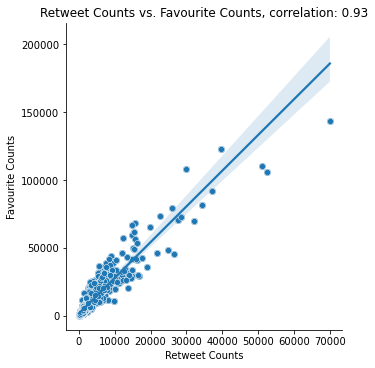

In [534]:
import seaborn as sns
%matplotlib inline

correlation = round(df_twitter['retweet_count'].corr(df_twitter['favorite_count']),2)

#linear model plot to create line of best fit
sns.lmplot(x="retweet_count", y="favorite_count", data=df_twitter)
#plot retweet counts and favourite counts as a scatter plot with line of best fit
ax = sns.scatterplot(x="retweet_count", y="favorite_count", data=df_twitter)

#Add Title
ax.set_title("Retweet Counts vs. Favourite Counts, correlation: " + str(correlation))
#Add x axis label
ax.set_xlabel("Retweet Counts")
#Add y axis label
ax.set_ylabel("Favourite Counts")
